# Graphing $f(Q^2) = x$

## Finding the formula

### Known Formulas

$$Q^2 = 2 \cdot E \cdot E_p \cdot (1 + \cos{\theta})$$

$$y = 1 - \frac{E_p}{2E} (1 - \cos{\theta})$$

$$Q^2 = sxy$$

$s$ is a constant. $y$ $\theta$ are the variables we need to remove.

### Final Formula

$x = \frac{Q^{2}4E^2}{s(Q^2 - 2EE_p + 4E^2)}$

In [15]:
import numpy as np
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
from math import log, cos, atan, degrees

# every line we graph
graphs = []

# x range
rang = np.logspace(0, 4, 1000)


# constants
s = 4 * 18 * 275
E = 10

# loop through electron energies
for Eprime in (i*2 for i in range(100)):
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = (4 * q * E**2) / (s * (q - 2*E*Eprime + 4*E**2))
        y = q / (xvar * s)
        # make sure x is within range
        if y > 1 or  xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        graphs.append([x, Q2])

# test for y
ylines = []

for y in [1, 0.1, 0.01]:
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = q / (y * s)
        y = q / (xvar * s)
        # make sure x is within range
        if xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        ylines.append([x, Q2])



## Graphing x vs. $Q^2$

99


Text(0.0031622776601683794, 1, '$y = 0.01$')

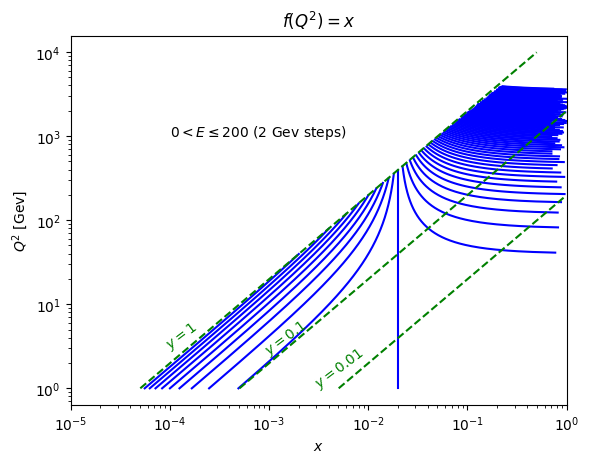

In [38]:

print(len(graphs))
plt.title('$f(Q^2) = x$')

for g in graphs:
    x, Q2 = g
    plt.plot(x, Q2, color = 'blue')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$x$')
    plt.xlim((10**-5 , 1))
    plt.ylabel('$Q^2$ [Gev]')

for g in ylines:
    x, Q2 = g
    plt.plot(x, Q2, color = 'green', ls = '--')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$x$')
    plt.xlim((10**-5 , 1))
    plt.ylabel('$Q^2$ [Gev]')

plt.text(10**-4,10**3, '$0<E\leq200$ (2 Gev steps)')

# find the slop of y line and rotate based on that

angle = 37
plt.text(10**-4, 10**.47, '$y = 1$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-3, 10**.39, '$y = 0.1$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-2.5, 1, '$y = 0.01$',
         color='green',
         rotation=angle, rotation_mode='anchor', )
